In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import zscore



In [18]:
df = pd.read_csv("flights-encoded.csv")
df.head

<bound method NDFrame.head of         month  day  sched_dep_time  dep_delay  sched_arr_time  arr_delay  \
0           1    1             315        2.0             499       11.0   
1           1    1             329        4.0             510       20.0   
2           1    1             340        2.0             530       33.0   
3           1    1             345       -1.0             622      -18.0   
4           1    1             360       -6.0             517      -25.0   
...       ...  ...             ...        ...             ...        ...   
327341      9   30            1365       -5.0            1431      -17.0   
327342      9   30            1370      -10.0               7      -20.0   
327343      9   30            1366       -5.0               1      -16.0   
327344      9   30            1375       12.0            1438        1.0   
327345      9   30            1439      -10.0             230      -25.0   

        carrier  flight  origin  dest  distance  day_of_w

In [19]:
print(df.columns)

Index(['month', 'day', 'sched_dep_time', 'dep_delay', 'sched_arr_time',
       'arr_delay', 'carrier', 'flight', 'origin', 'dest', 'distance',
       'day_of_week'],
      dtype='object')


In [20]:
# # Select specific features for training and prediction
# selected_features = ['dep_delay', 'sched_dep_time', 'sched_arr_time', 'arr_delay']  # Include target variable

# Filter DataFrame to include only where arr_delay is non negative
df_selected = df[df['arr_delay'] >= 0]

# Calculate Z-scores for each feature
z_scores = zscore(df_selected)

# Define a threshold for the absolute Z-score value
threshold = 3

# Filter out rows where any feature has an absolute Z-score greater than the threshold
df_selected_no_outliers = df_selected[(np.abs(z_scores) < threshold).all(axis=1)]

# Print the shape of the dataset before and after removing outliers
print("Shape of the dataset before removing outliers:", df_selected.shape)
print("Shape of the dataset after removing outliers:", df_selected_no_outliers.shape)

df_selected = df_selected_no_outliers

# Split dataset into features (X) and target variable (y)
X = df_selected.drop('arr_delay', axis=1)
y = df_selected['arr_delay']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression with linear activation
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Display model summary
model.summary()

# Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the Model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on Test Set: {mae}")

Shape of the dataset before removing outliers: (138413, 12)
Shape of the dataset after removing outliers: (132462, 12)


c:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 619.4730 - mae: 15.8599 - val_loss: 302.7770 - val_mae: 12.0812
Epoch 2/30
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 309.0201 - mae: 12.2662 - val_loss: 300.3225 - val_mae: 11.9069
Epoch 3/30
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 301.9893 - mae: 12.1829 - val_loss: 296.7231 - val_mae: 11.9040
Epoch 4/30
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 293.3040 - mae: 12.0979 - val_loss: 298.5106 - val_mae: 11.7460
Epoch 5/30
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 295.4246 - mae: 12.0526 - val_loss: 294.0233 - val_mae: 11.7886
Epoch 6/30
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 297.4494 - mae: 12.0841 - val_loss: 293.1352 - val_mae: 12.0005
Epoch 7/30
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 294.9421 - mae: 12.0932 - val_loss: 293.6674 - val_mae: 11.7149
Epoch 8/30
2650/2650 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 296.2385 - mae: 12.0836 - val_loss: 292.0942 - val_mae: 

828/828 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


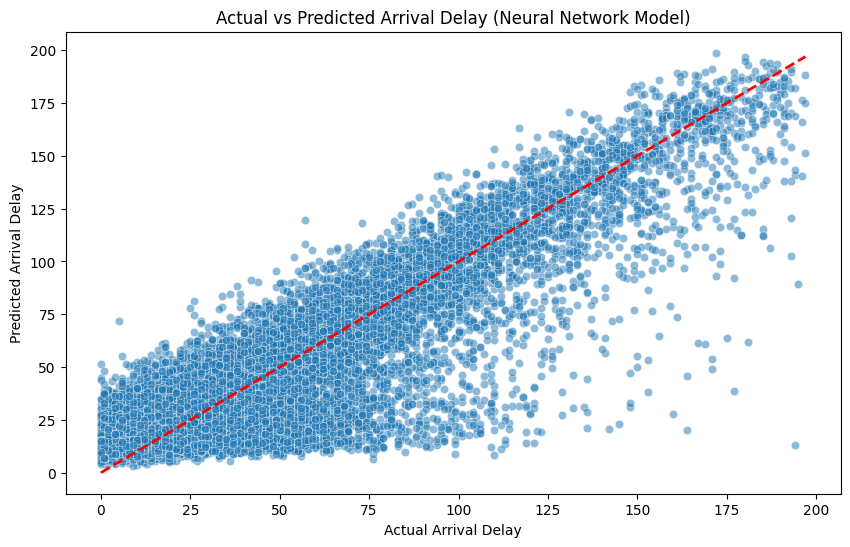

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.5)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Arrival Delay (Neural Network Model)')
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.show()


In [ ]:


# Filter DataFrame to include only selected features
df_selected = df

# Split dataset into features (X) and target variable (y)
X = df_selected.drop('arr_delay', axis=1)
y = df_selected['arr_delay']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, normalize features (if needed)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {mae}")

Mean Absolute Error on Test Set: 13.06240513189179


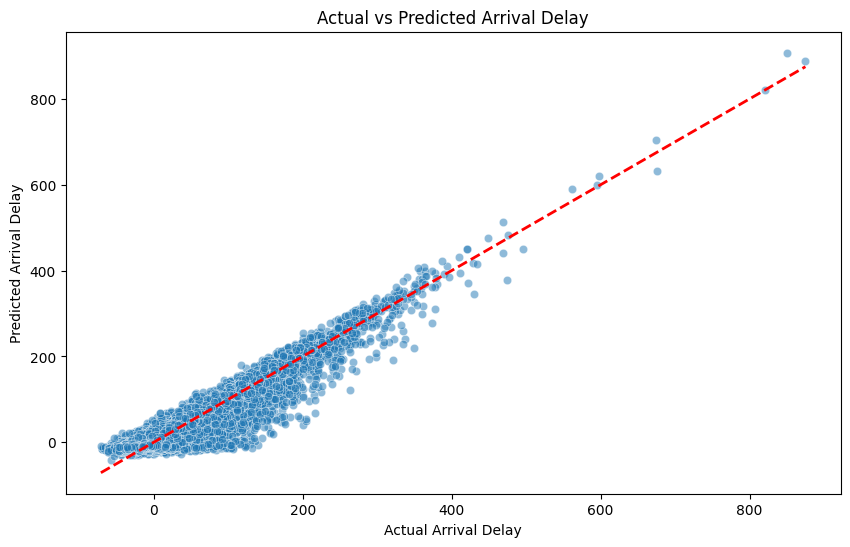

In [ ]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Arrival Delay')
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.show()

In [ ]:
# Split dataset into features (X) and target variable (y)
X = df_selected.drop('arr_delay', axis=1)
y = df_selected['arr_delay']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=256, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {mae}")

# Visualize Predicted vs Actual Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Arrival Delay (Random Forest Regression)')
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.show()

KeyboardInterrupt: 